In [1]:
import numpy as np
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from mpl_toolkits import mplot3d

In [2]:
l = 0.02
epsilon = l/2/math.pi

In [3]:
def A_operator(kx,ky,n):
    
    #n = 40
    a = 1.5
    b = 1.4
    c = 1
    d = 0.6
    NN = (2*n+1)*(2*n+1)
    A = np.zeros((2*NN, 2*NN))
    epsilon = l/2/math.pi
    
    for j in range(-n,n+1):
        for i in range(-n,n+1):
            index = (j+n)*(2*n+1)+i+n
            sigmaxxx = np.zeros((1,2*NN))
            sigmaxyy = np.zeros((1,2*NN))
            sigmayxx = np.zeros((1,2*NN))
            sigmayyy = np.zeros((1,2*NN))
        
            sigmaxxx[0,index] = (a+2*c)*(i/epsilon + kx)*(i/epsilon + kx)
            sigmaxxx[0,index+NN] =a*(j/epsilon + ky)*(i/epsilon + kx)
            sigmaxyy[0,index] = c*(j/epsilon + ky)*(j/epsilon + ky)
            sigmaxyy[0,index+NN] = c*(i/epsilon + kx)*(j/epsilon + ky)
            sigmayxx[0,index] = c*(j/epsilon + ky)*(i/epsilon + kx)
            sigmayxx[0,index+NN] = c*(i/epsilon + kx)*(i/epsilon + kx)
            sigmayyy[0,index] = a*(i/epsilon + kx)*(j/epsilon + ky)
            sigmayyy[0,index+NN] = (a+2*c)*(j/epsilon + ky)*(j/epsilon + ky)
            
            
            
            if i!=-n:
                sigmaxxx[0,index-1] = b/2*(i/epsilon + kx)*(i/epsilon - 1/epsilon + kx)
                sigmayyy[0,index-1] = b/2*(i/epsilon + kx)*(j/epsilon + ky)
                sigmaxxx[0,index+NN-1] =b/2*(j/epsilon + ky)*(i/epsilon - 1/epsilon + kx)
                sigmayyy[0,index+NN-1] = b/2*(j/epsilon + ky)*(j/epsilon + ky)



            if i!=n:
                sigmaxxx[0,index+1] = b/2*(i/epsilon + kx)*(i/epsilon + 1/epsilon + kx)
                sigmayyy[0,index+1] = b/2*(i/epsilon + kx)*(j/epsilon + ky)
                sigmaxxx[0,index+NN+1] =b/2*(j/epsilon + ky)*(i/epsilon + 1/epsilon + kx)
                sigmayyy[0,index+NN+1] = b/2*(j/epsilon + ky)*(j/epsilon + ky)

            if j!=-n:
                sigmaxxx[0,index-2*n-1] = d*(i/epsilon + kx)*(i/epsilon + kx)
                sigmaxyy[0,index-2*n-1] = d/2*(j/epsilon + ky)*(j/epsilon -1/epsilon + ky)
                sigmaxyy[0,index+NN-2*n-1] = d/2*(i/epsilon + kx)*(j/epsilon - 1/epsilon + ky)
                sigmayxx[0,index-2*n-1] = d/2*(j/epsilon + ky)*(i/epsilon + kx)
                sigmayxx[0,index+NN-2*n-1] = d/2*(i/epsilon + kx)*(i/epsilon + kx)
                sigmayyy[0,index+NN-2*n-1] = d*(j/epsilon + ky)*(j/epsilon - 1/epsilon + ky)



            if j!=n:
                sigmaxxx[0,index+2*n+1] = d*(i/epsilon + kx)*(i/epsilon + kx)
                sigmaxyy[0,index+2*n+1] = d/2*(j/epsilon + ky)*(j/epsilon + 1/epsilon + ky)
                sigmaxyy[0,index+NN+2*n+1] = d/2*(i/epsilon + kx)*(j/epsilon + 1/epsilon + ky)
                sigmayxx[0,index+2*n+1] = d/2*(j/epsilon + ky)*(i/epsilon + kx)
                sigmayxx[0,index+NN+2*n+1] = d/2*(i/epsilon + kx)*(i/epsilon + kx)
                sigmayyy[0,index+NN+2*n+1] = d*(j/epsilon + ky)*(j/epsilon + 1/epsilon + ky)
            
            A[index,:] = sigmaxxx + sigmaxyy
            A[index+NN,:] = sigmayxx + sigmayyy
        
    
    return A

In [4]:
eigen = np.linalg.eig(A_operator(0.2,1.2,5))
np.min(eigen[0])

-1.0190857113310923

In [5]:
def Eigenfunc(x,y,coeff,n):
    
    this_m = np.arange(-n,n+1)
    this_n = np.arange(-n,n+1)
    
    exp_mx = np.exp(1j*this_m*x/epsilon)
    exp_ny = np.exp(1j*this_n*y/epsilon)
    
    exp_xy_mat = np.outer(exp_ny,exp_mx)
    exp_xy_vec = exp_xy_mat.flatten()
    
    return np.dot(exp_xy_vec,coeff)

In [6]:
def myfunctoint_cal(kx,ky,x,y,this_x,this_y):
    n= 3
    NN = (2*n+1)*(2*n+1)
    #this_x = l/8
    eigen = np.linalg.eig(A_operator(kx,ky,n))
    coeff = eigen[1][:,np.argmin(eigen[0])]
    coeff_x = coeff[:NN]
    coeff_y = coeff[NN:]
    lamda_cal = np.min(eigen[0])
    
    fi_x = Eigenfunc(this_x,this_y,coeff_x,n)
    fi_y = Eigenfunc(this_x,this_y,coeff_y,n)
    
    fi_xp = Eigenfunc(this_x+x,this_y+y,coeff_x,n)
    fi_yp = Eigenfunc(this_x+x,this_y+y,coeff_y,n)
    
    kernel_toint = np.zeros((2, 2),dtype=complex)
    
    kernel_toint[0,0] = fi_x*np.conj(fi_xp)
    kernel_toint[0,1] = fi_x*np.conj(fi_yp)
    kernel_toint[1,0] = fi_y*np.conj(fi_xp)
    kernel_toint[1,1] = fi_y*np.conj(fi_yp)
    

    return (np.exp(-1j*x*kx-1j*y*ky)*kernel_toint).real*lamda_cal/l
    #return (np.exp(-1j*x*kx-1j*y*ky)*fi_x*np.conj(fi_xp)).real*lamda_cal/l

In [62]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 30)
z = np.cos(x[:,None])**4 + np.sin(y)**2
z.shape

(20, 30)

In [63]:
np.sum(z)

511.3376856772786

In [39]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 30)
z = np.exp(-1j*x[:,None]-1j*y)
zz = integrate.simps(z, y)

zz.shape

(20,)

In [24]:
range(0,5)[4]

4

In [88]:
def myfunction_cal_dis(lambda_dis,phi_x,phi_y,number_k,number_x,this_x,this_y):
    #this_x,this_y=0
    kernel_mat = np.zeros((4,number_x,number_x))
    
    kx = np.linspace(-1/2/epsilon,1/2/epsilon,number_k)
    ky = np.linspace(-1/2/epsilon,1/2/epsilon,number_k)
    
    x = np.linspace(-l*10,l*10,number_x)
    y = np.linspace(-l*10,l*10,number_x)

    #KX,KY = np.meshgrid(kx,ky)

    
    mid = int((number_x-1)/2)
    #fi_x = Eigenfunc(this_x,this_y,coeff_x,n)
    fi_x = phi_x[:,:,mid+this_x,mid+this_y]
    #fi_y = Eigenfunc(this_x,this_y,coeff_y,n)
    fi_y = phi_y[:,:,mid+this_x,mid+this_y]
    for i in range(this_x,number_x-this_x):
        #print(i)
        for j in range(this_y,number_x-this_y):
            
            
            Exp_kernel = np.exp(-1j*x[i]*kx[:,None]-1j*y[j]*ky)
    
            #fi_xp = Eigenfunc(this_x+x,this_y+y,coeff_x,n)
            fi_xp = phi_x[:,:,i+this_x,j+this_y]
            #fi_yp = Eigenfunc(this_x+x,this_y+y,coeff_y,n)
            fi_yp = phi_y[:,:,i+this_x,j+this_y]
            
            kernel_mat_toint00 = (Exp_kernel*fi_x*np.conj(fi_xp)).real*lambda_dis/epsilon/epsilon
            kernel_mat_toint01 = (Exp_kernel*fi_x*np.conj(fi_yp)).real*lambda_dis/epsilon/epsilon
            kernel_mat_toint10 = (Exp_kernel*fi_y*np.conj(fi_xp)).real*lambda_dis/epsilon/epsilon
            kernel_mat_toint11 = (Exp_kernel*fi_y*np.conj(fi_yp)).real*lambda_dis/epsilon/epsilon
            
            #kernel_toint[0,0] = fi_x*np.conj(fi_xp)
            #kernel_toint[0,1] = fi_x*np.conj(fi_yp)
            #kernel_toint[1,0] = fi_y*np.conj(fi_xp)
            #kernel_toint[1,1] = fi_y*np.conj(fi_yp)
            
            kernel_mat[0,i,j] = integrate.simps(integrate.simps(kernel_mat_toint00,ky),kx)
            kernel_mat[1,i,j] = integrate.simps(integrate.simps(kernel_mat_toint01,ky),kx)
            kernel_mat[2,i,j] = integrate.simps(integrate.simps(kernel_mat_toint10,ky),kx)
            kernel_mat[3,i,j] = integrate.simps(integrate.simps(kernel_mat_toint11,ky),kx)
            
            
            
    
    return kernel_mat
    
    

In [109]:
testttt = myfunction_cal_dis(lambda_dis,phi_x,phi_y,number_k,number_x,4,0)

In [106]:
horizon = 5
kernel_list = [[0]*horizon for i in range(horizon)]

for i in range(horizon):
    for j in range(horizon):
        print(i,j)
        # i=this_x, j=this_y
        kernel_this = myfunction_cal_dis(lambda_dis,phi_x,phi_y,number_k,number_x,i,j)
        kernel_list[i][j] = kernel_this

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
3 4
4 0
4 1
4 2
4 3
4 4


In [193]:
horizon = 45
N = 50*5 + 1 + 2*horizon

mid = int(N/2)

NN = N*N

kernel0 = [[np.zeros((4))]*5 for i in range(5)]
for i in range(5):
    for j in range(5):
        kernel0[i][j] = -np.sum(kernel_list[i][j],axis=(1,2))
rho = 8000
L = 1
l = 0.02
Eave = 10e9
Ttotal = 1e-3
dt = 1e-8
Tsteps = int(np.ceil(Ttotal/dt))
u1 = np.zeros((N,N))
u2 = np.zeros((N,N))
utt = np.zeros((N,N))
ut1 = np.zeros((N,N))
ut2 = np.zeros((N,N))

v1 = np.zeros((N,N))
v2 = np.zeros((N,N))
vtt = np.zeros((N,N))
vt1 = np.zeros((N,N))
vt2 = np.zeros((N,N))

u_initial = np.zeros((N,N))
v_initial = np.zeros((N,N))

for i in range(mid-int(mid/8),mid+int(mid/8)+1):
    for j in range(mid-int(mid/8),mid+int(mid/8)):
        u_initial[i,j] = np.exp(-((i-mid)**2+(j-mid)**2)/200)

u2 = u_initial

for tt in range(Tsteps):
    for i in range(horizon,N-horizon):
        for j in range(horizon,N-horizon):
            position_x = 
            position_y = 
            
            #mind the minus


In [196]:
kernel0[0][0]

array([ 5.42467210e+12, -6.39662842e+02, -6.97661560e+02, -9.70572121e+13])

In [195]:
u2.max()

1.0

In [132]:
kernel_list[1][1].shape

(4, 101, 101)

In [186]:
Z[mid-21,mid-21]

0.012155178329914935

Text(0.5,0,'z')

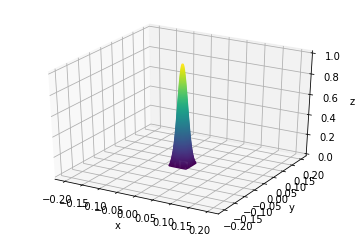

In [185]:
x = np.linspace(-l*10,l*10,N)
y = np.linspace(-l*10,l*10,N)
X,Y = np.meshgrid(x,y)
Z = u_initial
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

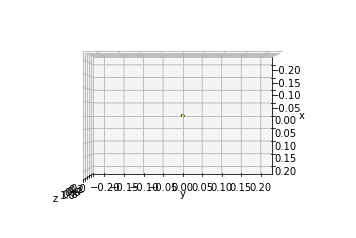

In [155]:
ax.view_init(90,0)
fig

Text(0.5,0,'z')

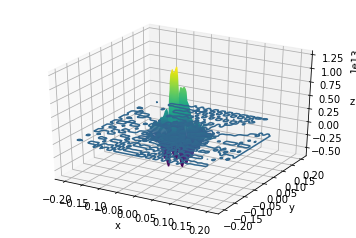

In [79]:
x = np.linspace(-l*10,l*10,number_x)
y = np.linspace(-l*10,l*10,number_x)
X,Y = np.meshgrid(x,y)
Z = -testttt[1,:,:]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z,100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

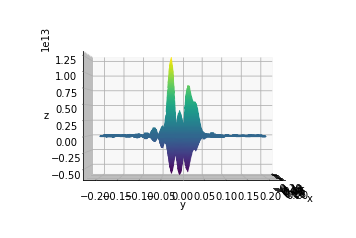

In [81]:
ax.view_init(0,0)
fig

In [8]:
def myfunctoint_cal_testxx(kx,ky,x,y,this_x,this_y):
    return myfunctoint_cal(kx,ky,x,y,this_x,this_y)[0,0]

In [9]:
def myfunc_cal(x,y,this_x,this_y):
    return integrate.nquad(myfunctoint_cal_testxx,\
                           [[-1/2/epsilon,1/2/epsilon],[-1/2/epsilon,1/2/epsilon]],args=(x,y,this_x,this_y),\
                           opts={'epsrel':1e-3})[0]

In [10]:
l

0.02

In [7]:
# calculating discrete result for eigenfunction and eigenvalue

number_k = 101
kx = np.linspace(-1/2/epsilon,1/2/epsilon,number_k)
ky = np.linspace(-1/2/epsilon,1/2/epsilon,number_k)

lambda_dis = np.zeros((number_k,number_k))

number_x = 101

x = np.linspace(-l*10,l*10,number_x)
y = np.linspace(-l*10,l*10,number_x)

phi_x = np.zeros((number_k,number_k,number_x,number_x),dtype=complex)
phi_y = np.zeros((number_k,number_k,number_x,number_x),dtype=complex)

for i in range(number_k):
    print(i)
    for j in range(number_k):
        #print(i,j)
        n= 10
        NN = (2*n+1)*(2*n+1)

        eigen = np.linalg.eig(A_operator(kx[i],ky[j],n))
        coeff = eigen[1][:,np.argmin(eigen[0])]
        coeff_x = coeff[:NN]
        coeff_y = coeff[NN:]
        lambda_dis[i,j] = np.min(eigen[0])

        for p in range(number_x):
            for q in range(number_x):
                phi_x[i,j,p,q] = Eigenfunc(x[p],y[q],coeff_x,n)
                phi_y[i,j,p,q] = Eigenfunc(x[p],y[q],coeff_y,n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [8]:
phi_x.shape

(101, 101, 101, 101)

In [9]:
np.save('./Documents/CFR/phi_x_2D',phi_x)

In [10]:
np.save('./Documents/CFR/phi_y_2D',phi_y)

In [11]:
np.save('./Documents/CFR/lambda_dis_2D',lambda_dis)

In [111]:
def myfunc_cal_direct(x,y,this_x,this_y):
    number = 30
    kx = np.linspace(-1/2/epsilon,1/2/epsilon,number)
    ky = np.linspace(-1/2/epsilon,1/2/epsilon,number)
    dxdy = 1/epsilon/epsilon/number/number

    X,Y = np.meshgrid(kx,ky)

    Z = np.vectorize(myfunctoint_cal_testxx)(X,Y,x,y,this_x,this_y)
    return np.sum(Z)*dxdy

In [112]:
number = 100
kernel_test = np.zeros((100,100))
xx = np.linspace(-0.2,0.2,num = number)
yy = np.linspace(-0.2,0.2,num = number)
for i in range(number):
    print(i)
    for j in range(number):
        #print(i,j)
        kernel_test[i,j] = myfunc_cal_direct(xx[i],yy[j],0,0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [16]:
from mpl_toolkits import mplot3d

In [50]:
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))

In [51]:
x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)